**Get start With Pytorch In Google Collab With Free GPU** [link](https://www.marktechpost.com/2021/01/09/getting-started-with-pytorch-in-google-collab-with-free-gpu/
)
### Steps: 
> **1. Get a pretrained model** <br/>
**2. Compose the preprocess for model input** <br/>
**3. Prepare a input** <br/>
**4. Preprocess the input to fullfil the model's input format** <br/>
**5. Set model to evaluation mode** <br/>
**6. Send the preprocessed input to the model** <br/>
**7. Print the model output**

### Steps
> **1. Get a pretrained model**

In [2]:
from torchvision import models
from torchvision import transforms

In [3]:
# download the pretrained modele from torch official site
resnet = models.resnet101(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:04<00:00, 43.8MB/s]


### Step
> **2. Compose the preprocess for model input**

In [4]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[.485, .456, .406],
    std=[.229, .224, .225]
    )
])

### Step
> **3. Prepare a input**


> *Tutorial of uploading data to Google Colab* [link](https://medium.com/@rk.sarthak01/how-to-import-files-images-in-google-colab-from-your-local-system-46a801b1e568)


In [5]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
# Run the followin code and select an image in your local folder using the 'Browse' button
uploaded = files.upload()

Saving cat.jpeg to cat.jpeg


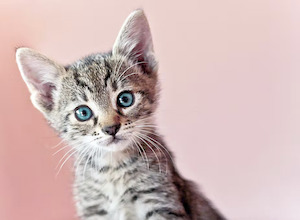

In [6]:
from PIL import Image

img = Image.open('A_Image_Cat.jpeg')
display(img)

In [7]:
img_t = preprocess(img)
print('Image size before processes: ', img.size, '; Image sie after processes: ', img_t.shape)
#plt.imshow(img_t.permute(1, 2, 0))

Image size before processes:  (300, 220) ; Image sie after processes:  torch.Size([3, 224, 224])


### Step
> **4. Preprocess the input to fullfil the model's input format**

In [8]:
import torch
batch_t = torch.unsqueeze(img_t,0) # add dim 0 to fulfill the input format of torch
print('Image size for torch input', batch_t.shape)

Image size for torch input torch.Size([1, 3, 224, 224])


### Step
> **5. Set model to evaluation mode** <br/>
> **6. Send the preprocessed input to the model**

In [9]:
resnet.eval() #set model in evaluation mode
out = resnet(batch_t) 
print('Size of the model output: ', out.shape)

Size of the model output:  torch.Size([1, 1000])


### Step
> **7. Print the model output**

In [10]:
# Run the followin code and select 'A_imagenet_classes.txt' in your local folder using the 'Browse' button
uploaded = files.upload()

Saving imagenet_classes.txt to imagenet_classes.txt


In [11]:
with open('A_imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

print('Size of labels: ', len(labels))

Size of labels:  1000


In [12]:
_, index = torch.max(out,1) # get the max index of dim1
pred_prob = torch.nn.functional.softmax(out,dim=1)[0]*100 # softmax for getting the prob of the given input

In [13]:
print('Predicted category (with prob.): ',labels[index[0]],'( ', pred_prob[index[0]].item(), ' )')

Predicted category (with prob.):  tabby, tabby cat (  56.94171905517578  )
